# Quantum Harmonic Oscillator Simulation

This experiment simulates the probability density of a quantum particle in a 1D harmonic potential well, visualizing the stationary states for a chosen energy level.

## What is Simulated
- The probability density of a quantum harmonic oscillator.
- Stationary wavefunctions for a selected energy level (n=1 by default).
- The behavior of a quantum particle bound in a potential well.

## How to Run
1. Set the desired energy level (`n`).
2. Run the notebook to generate the animated probability density plot.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# System parameters
hbar = 1.0  # Reduced Planck's constant (simplified)
m = 1.0     # Mass (simplified)
omega = 1.0 # Angular frequency
n_levels = 5  # Number of energy levels (discrete energy states)

In [3]:
# Function to calculate the wave function of the harmonic oscillator
def wave_function(x, n):
    normalization = 1.0 / np.sqrt(2.0**n * math.factorial(n)) * (m * omega / (np.pi * hbar))**0.25
    Hn = np.polynomial.hermite.Hermite([0] * (n) + [1])
    return normalization * Hn(np.sqrt(m*omega/hbar) * x) * np.exp(-0.5 * (m*omega/hbar) * x**2)

In [4]:
# Function to calculate the probability distribution
def probability_distribution(x, n):
    return np.abs(wave_function(x, n))**2

In [5]:
# Define position space
x = np.linspace(-5, 5, 400)

Text(0, 0.5, 'Probability Density')

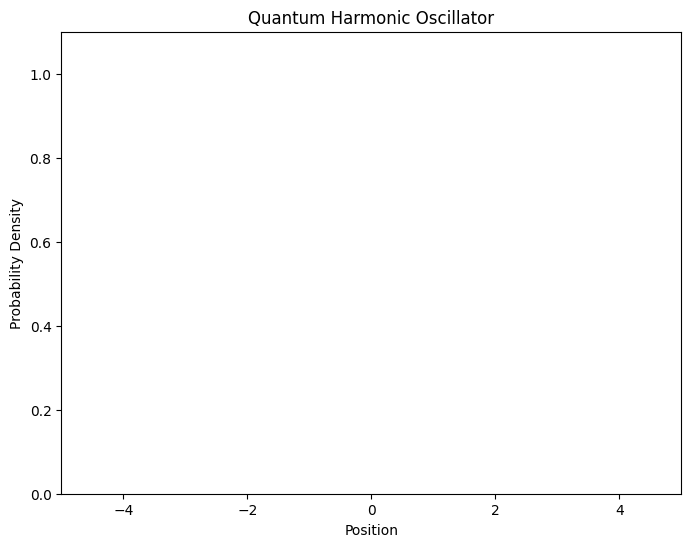

In [6]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot([], [], lw=2)
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1.1)
ax.set_title('Quantum Harmonic Oscillator')
ax.set_xlabel('Position')
ax.set_ylabel('Probability Density')

In [7]:
# Initialize the animation function
def init():
    line.set_data([], [])
    return line,

In [8]:
# Update function for animation
def update(frame):
    n = frame % n_levels  # Cycling through energy levels
    y = probability_distribution(x, n)
    line.set_data(x, y)
    return line,

In [9]:
# Create the animation
ani = FuncAnimation(fig, update, frames=range(100), init_func=init, blit=True, interval=200)

from IPython.display import HTML
HTML(ani.to_jshtml())